In [1]:
import cloudViewer as o3d
import os
import time
import sys

# monkey patches visualization and provides helpers to load geometries
sys.path.append('../..')
import cloudViewer_tutorial as cv3dtut
# change to True if you want to interact with the visualization windows
cv3dtut.interactive = not "CI" in os.environ

# Intrinsic shape signatures (ISS)

In this tutorial we will show how to detect the **ISS** Keypoints of a 3D shape. The implementation is based on the keypoint detection modules proposed in Yu Zhong , "Intrinsic Shape Signatures: A Shape Descriptor for 3D Object Recognition", 2009.


## ISS Keypoints

ISS saliency measure is based on the Eigenvalue Decomposition (EVD) of the scatter matrix $\boldsymbol{\Sigma}(\mathbf{p})$ of the points belonging to the support of $p$, i.e.

$$\begin{array}{l}
\boldsymbol{\Sigma}(\mathbf{p})=\frac{1}{N} \sum_{\mathbf{q} \in \mathcal{N}(\mathbf{p})}\left(\mathbf{q}-\mu_{\mathbf{p}}\right)\left(\mathbf{q}-\mu_{\mathbf{p}}\right)^{T} \quad \text { with } \\
\mu_{\mathbf{p}}=\frac{1}{N} \sum_{\mathbf{q} \in \mathcal{N}(\mathbf{p})} \mathbf{q}
\end{array}$$

Given $\boldsymbol{\Sigma}(\mathbf{p})$, its eigenvalues in decreasing magnitude order are denoted here as $\lambda_1$, $\lambda_2$, $\lambda_3$. During the pruning stage, points whose ratio between two successive eigenvalues is below a threshold are retained:

$$\frac{\lambda_{2}(\mathbf{p})}{\lambda_{1}(\mathbf{p})}<\gamma_{12} \wedge \frac{\lambda_{3}(\mathbf{p})}{\lambda_{2}(\mathbf{p})}<\gamma_{23}$$

The rationale is to avoid detecting keypoints at points exhibiting a similar spread along the principal directions, where a repeatable canonical reference frame cannot be established and, therefore, the subsequent description stage can hardly turn out effective. Among remaining points, the saliency is determined by the magnitude of the smallest eigenvalue

$$\rho(\mathbf{p}) \doteq \lambda_{3}(\mathbf{p})$$

So as to include only points with large variations along each principal direction.

After the detection step, a point will be considered a **keypoint** if it has the maxium saliency value on a given neighborhood.

**NOTE:** For more details please reffer to the original publication or to "Performance Evaluation of 3D Keypoint Detectors", by Tombari et.al.

## ISS keypoint detection example

ISS Computation took 342 [ms]


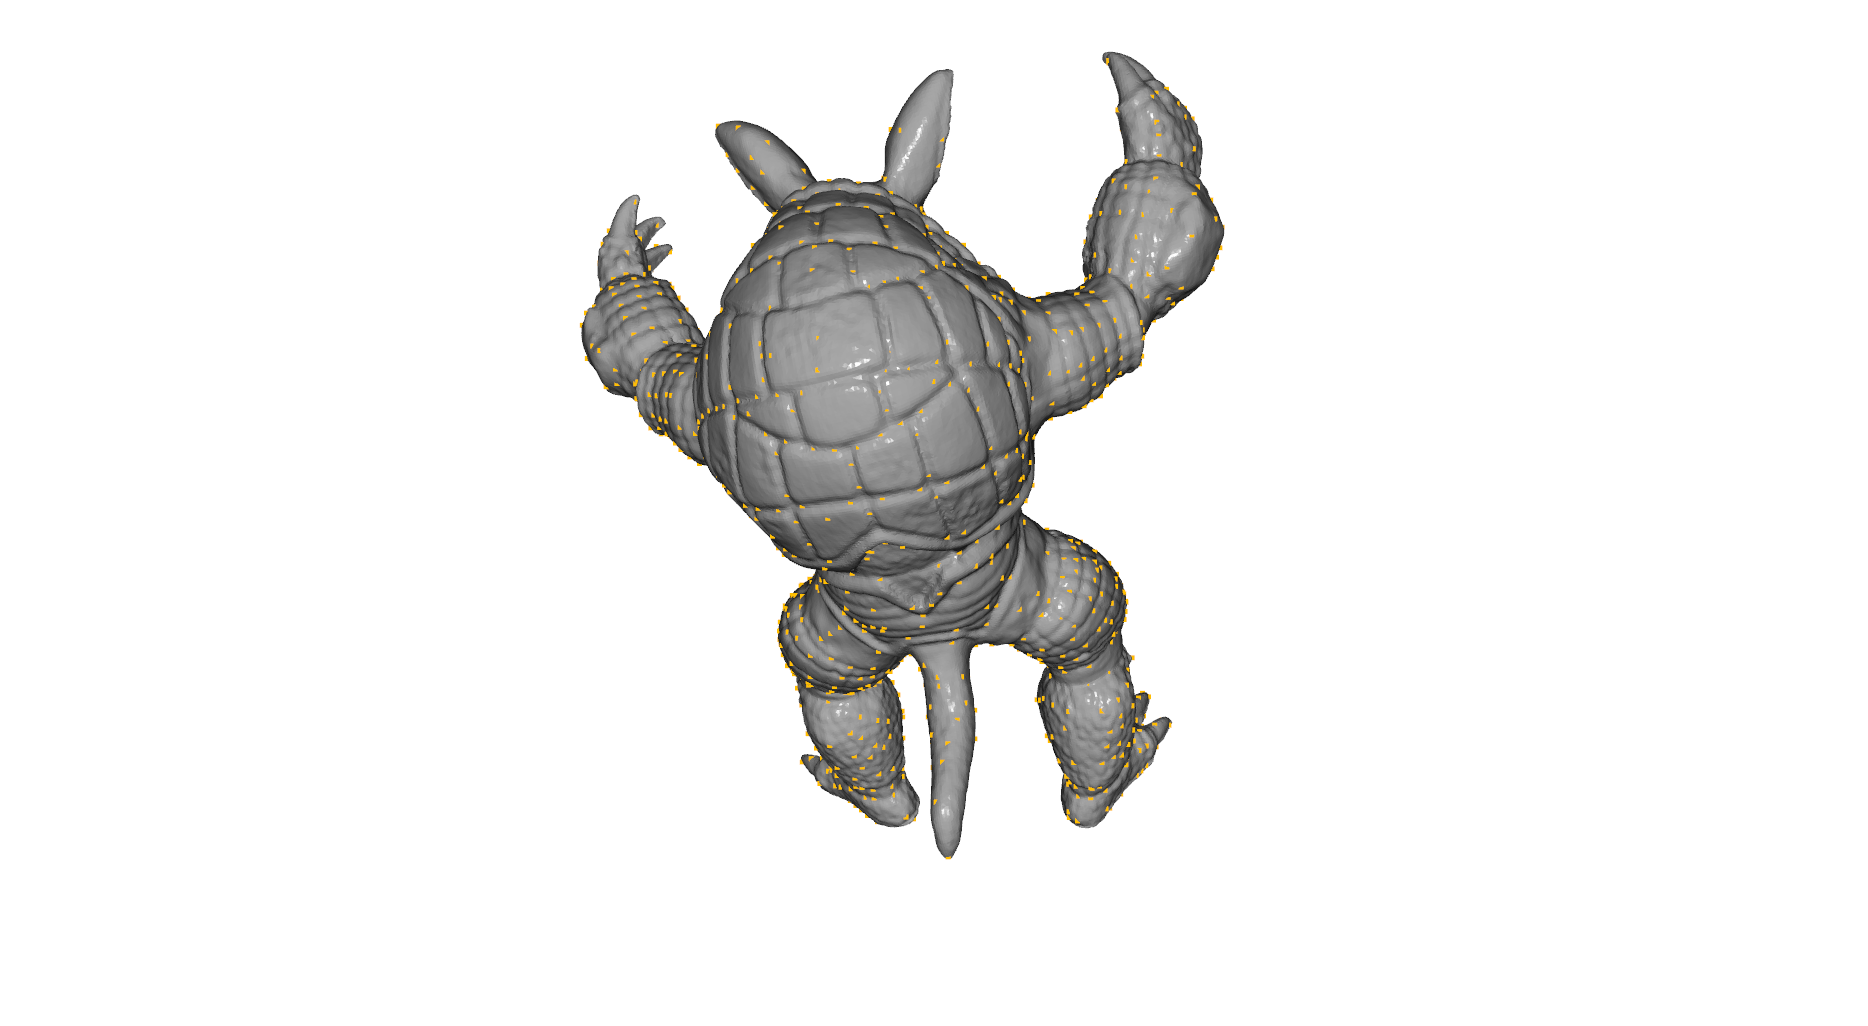

In [2]:
# Compute ISS Keypoints on Armadillo
mesh = cv3dtut.get_armadillo_mesh()
pcd = o3d.geometry.ccPointCloud()
pcd.set_points(mesh.get_vertices())

tic = time.time()
keypoints = o3d.geometry.keypoint.compute_iss_keypoints(pcd)
toc = 1000 * (time.time() - tic)
print("ISS Computation took {:.0f} [ms]".format(toc))

mesh.compute_vertex_normals()
mesh.paint_uniform_color([0.5, 0.5, 0.5])
keypoints.paint_uniform_color([1.0, 0.75, 0.0])
o3d.visualization.draw_geometries([keypoints, mesh], front=[0, 0, -1.0])

In [3]:
# This function is only used to make the keypoints look better on the rendering
def keypoints_to_spheres(keypoints):
    spheres = o3d.geometry.ccMesh()
    spheres.create_internal_cloud()
    for keypoint in keypoints.get_points():
        sphere = o3d.geometry.ccMesh.create_sphere(radius=0.001)
        sphere.translate(keypoint)
        spheres += sphere
    spheres.paint_uniform_color([1.0, 0.75, 0.0])
    return spheres

ISS Computation took 29 [ms]


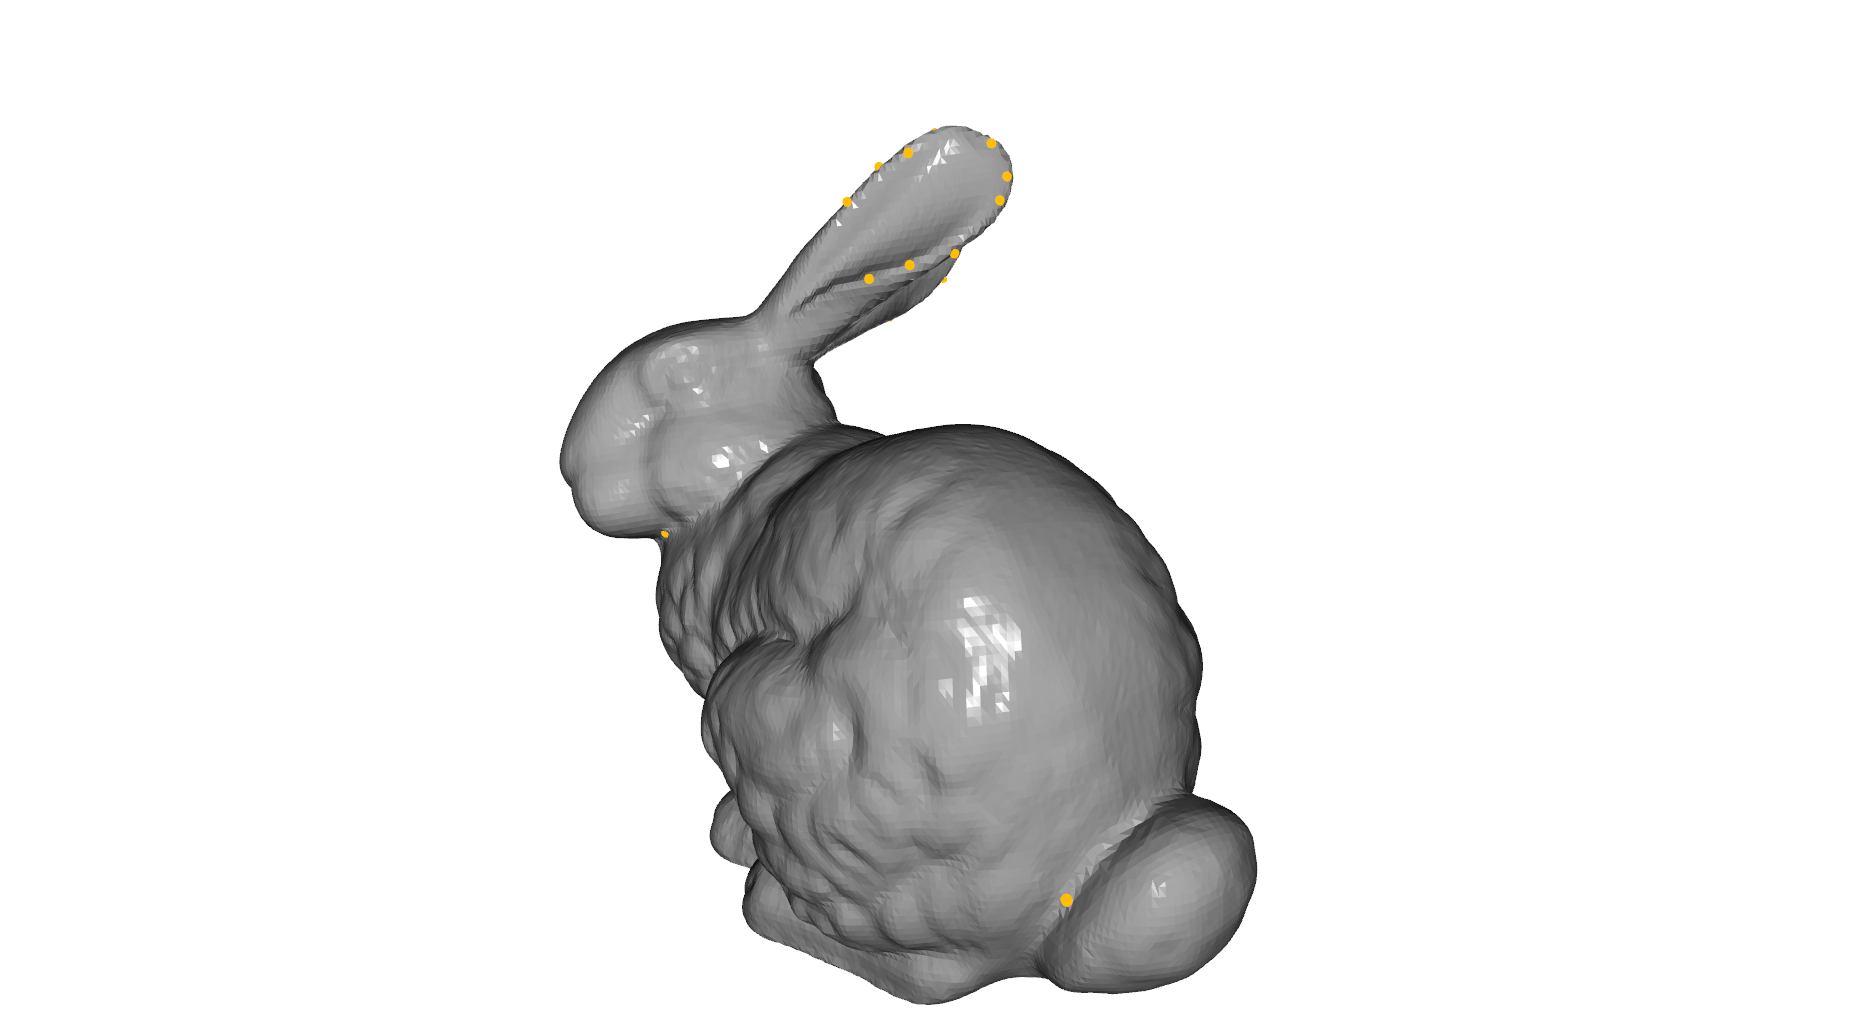

In [4]:
# Compute ISS Keypoints on Standford Bunny, changing the default parameters
mesh = cv3dtut.get_bunny_mesh()
pcd = o3d.geometry.ccPointCloud()
pcd.set_points(mesh.get_vertices())

tic = time.time()
keypoints = o3d.geometry.keypoint.compute_iss_keypoints(pcd,
                                                        salient_radius=0.005,
                                                        non_max_radius=0.005,
                                                        gamma_21=0.5,
                                                        gamma_32=0.5)
toc = 1000 * (time.time() - tic)
print("ISS Computation took {:.0f} [ms]".format(toc))

mesh.compute_vertex_normals()
mesh.paint_uniform_color([0.5, 0.5, 0.5])
o3d.visualization.draw_geometries([keypoints_to_spheres(keypoints), mesh])